In [1]:
import os
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython
import IPython.display
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

2025-05-15 19:42:18.052737: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-15 19:42:18.172397: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-15 19:42:18.286261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747330938.385881   14243 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747330938.413384   14243 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747330938.608884   14243 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

The warning above indicates that there are no CUDA drivers installed on the machine. I'm using two different machines for development. When I run the code on my Linux machine, I receive this warning, but there's no risk involved. For more demanding tasks, I use my other system, which has the necessary CUDA support.

In [2]:
CSV_PATH = "../data/merged_dataset.csv"

df = pd.read_csv(CSV_PATH)
date_time = pd.to_datetime(df.pop('datetime_utc'))

array([<Axes: xlabel='datetime_utc'>, <Axes: xlabel='datetime_utc'>,
       <Axes: xlabel='datetime_utc'>, <Axes: xlabel='datetime_utc'>],
      dtype=object)

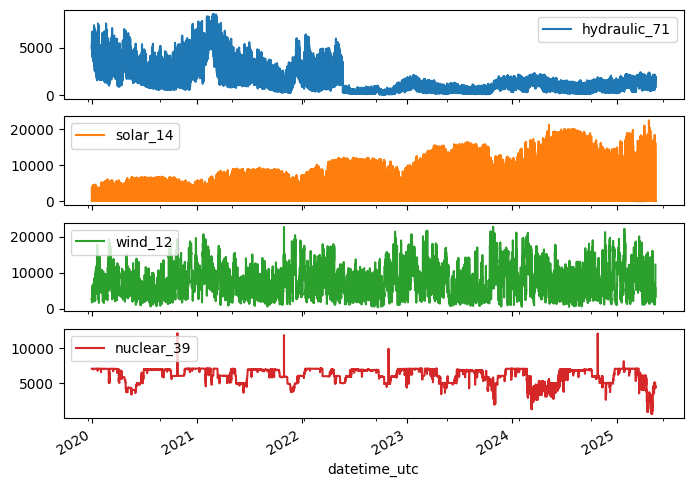

In [3]:
plot_cols = ['hydraulic_71', 'solar_14', 'wind_12', 'nuclear_39']
plot_features = df[plot_cols]
plot_features.index = date_time
plot_features.plot(subplots=True)


## Inspect and clean up
Lets inspect the data, clean it up, and look for some weird values

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hydraulic_71,47034.0,1574.836519,1475.030904,39.050,504.9875,1099.650,2068.0750,8610.60
hydraulic_36,47082.0,2703.652400,1877.723885,204.700,1165.5250,2199.550,3813.1750,9528.00
hydraulic_1,47082.0,2828.366144,1925.923819,237.300,1247.2750,2342.900,3966.1000,9720.70
solar_14,46974.0,3573.127155,4874.417922,0.100,37.4000,428.750,6196.3250,22529.00
wind_12,47082.0,7549.206501,4009.154905,392.800,4366.7250,6809.000,10107.8250,22685.60
nuclear_39,47082.0,6179.608224,1070.251553,675.000,5656.4500,6756.250,7005.9000,12146.40
nuclear_4,47000.0,6142.171960,1173.572118,50.000,5683.2000,6802.000,7021.6000,12146.40
nuclear_74,47034.0,3655.430010,2456.464686,35.500,1522.6750,1771.375,6105.3000,12146.40
peninsula_forecast_460,47082.0,26906.370099,4381.018057,8644.000,23356.0000,26861.000,30194.0000,41615.00
scheduled_demand_365,47033.0,13739.466997,9189.089796,3385.775,5677.2750,7069.925,22532.5000,35791.70


In [5]:
df.isna().sum()

hydraulic_71                          48
hydraulic_36                           0
hydraulic_1                            0
solar_14                             108
wind_12                                0
nuclear_39                             0
nuclear_4                             82
nuclear_74                            48
peninsula_forecast_460                 0
scheduled_demand_365                  49
scheduled_demand_358                   0
scheduled_demand_372                   0
daily_spot_market_600_España           0
daily_spot_market_600_Portugal         0
average_demand_price_573_Baleares     48
average_demand_price_573_Canarias     48
average_demand_price_573_Ceuta        48
average_demand_price_573_Melilla      48
dtype: int64

I'm gonna fill the data with the default method

In [6]:
df = df.ffill()
df.isna().sum()

hydraulic_71                         0
hydraulic_36                         0
hydraulic_1                          0
solar_14                             0
wind_12                              0
nuclear_39                           0
nuclear_4                            0
nuclear_74                           0
peninsula_forecast_460               0
scheduled_demand_365                 0
scheduled_demand_358                 0
scheduled_demand_372                 0
daily_spot_market_600_España         0
daily_spot_market_600_Portugal       0
average_demand_price_573_Baleares    0
average_demand_price_573_Canarias    0
average_demand_price_573_Ceuta       0
average_demand_price_573_Melilla     0
dtype: int64

In [7]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

### Split the data

In [8]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.6)]
val_df = df[int(n*0.6):int(n*0.8)]
test_df = df[int(n*0.8):]

num_features = df.shape[1]


### Normalize the data

In [9]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


Some plots

/tmp/ipykernel_14243/3214313372.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


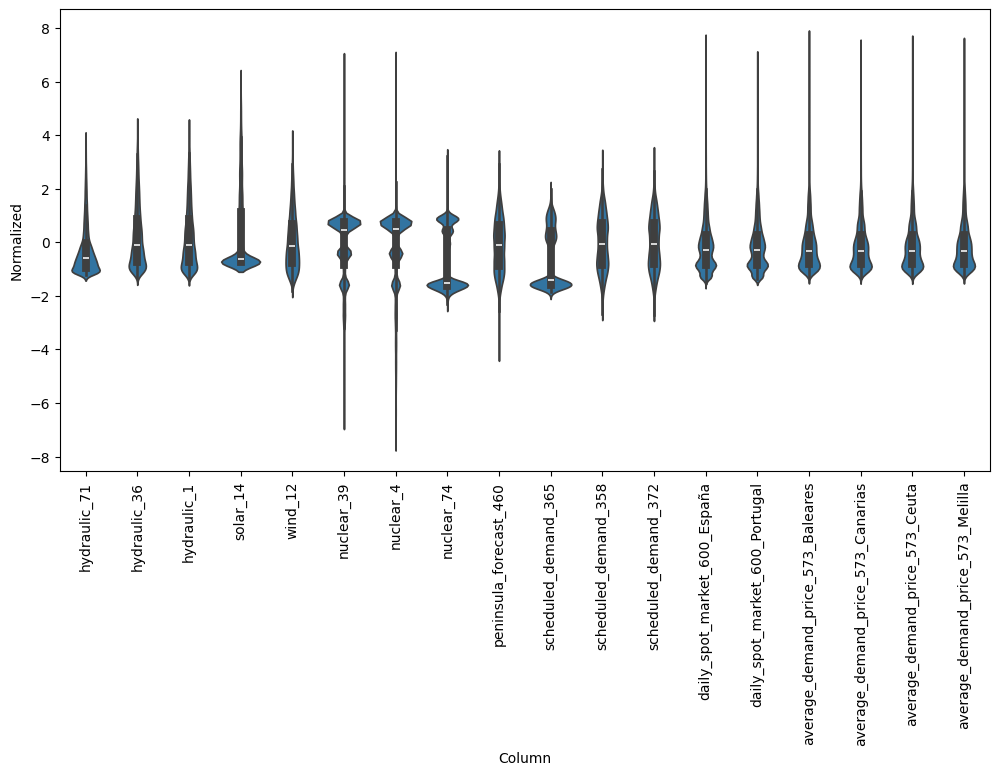

In [10]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

### Data windowing. 
First try im gonna predict one hour having 6 hours


In [11]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

      # Slicing doesn't preserve static shape information, so set the shapes
      # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def plot(self, model=None, plot_col='daily_spot_market_600_España', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                            label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                                        marker='X', edgecolors='k', label='Predictions',
                                        c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')


    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,)

        ds = ds.map(self.split_window)

        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])


In [13]:
w = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['daily_spot_market_600_España'])

This is the way i create an example, but adding example property this is not needed.
Anyway this aint gonna work because example is a property and got no setter. 
Gotta comment the example class property for running this. 

In [14]:
# example_window = tf.stack([np.array(train_df[:w.total_window_size]),
#                            np.array(train_df[100:100+w.total_window_size]),
#                            np.array(train_df[200:200+w.total_window_size])])

# example_inputs, example_labels = w.split_window(example_window)

# w.example = example_inputs, example_labels

2025-05-12 18:48:48.692284: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


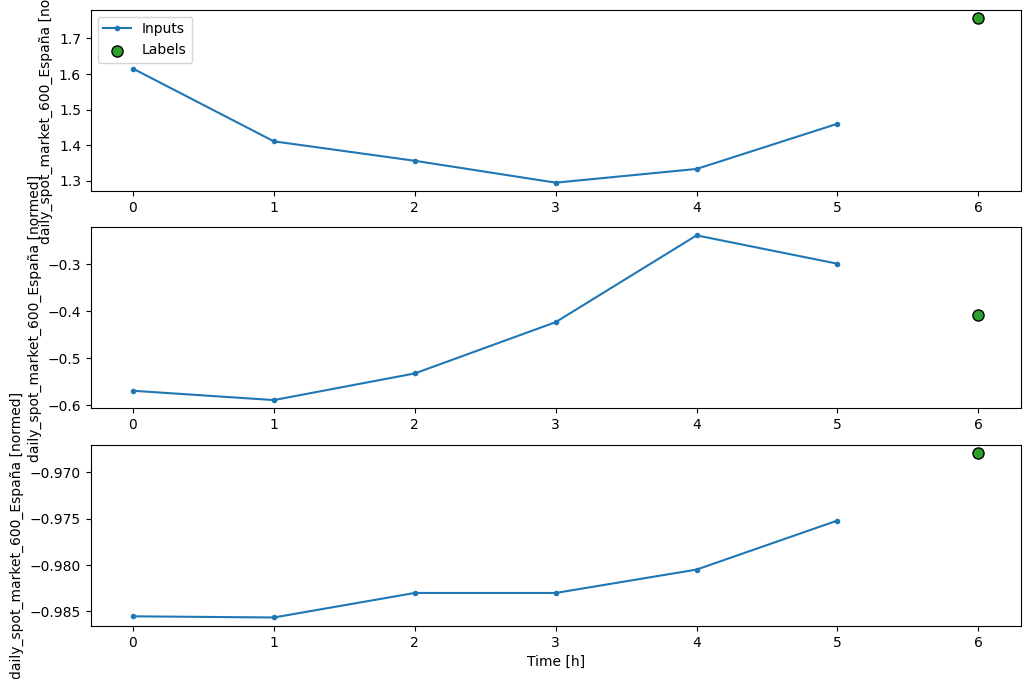

In [15]:
w.plot()

## Simplest model

The simplest model I can build is the single step model. Here we got it.

In [16]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['daily_spot_market_600_España'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['daily_spot_market_600_España']

In [17]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 18)
Labels shape (batch, time, features): (32, 1, 1)


2025-05-12 18:48:59.960843: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Baseline

In [18]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [19]:
baseline = Baseline(label_index=column_indices['daily_spot_market_600_España'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0259 - mean_absolute_error: 0.1014


In [20]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['daily_spot_market_600_España'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['daily_spot_market_600_España']

In [21]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 18)
Output shape: (32, 24, 1)


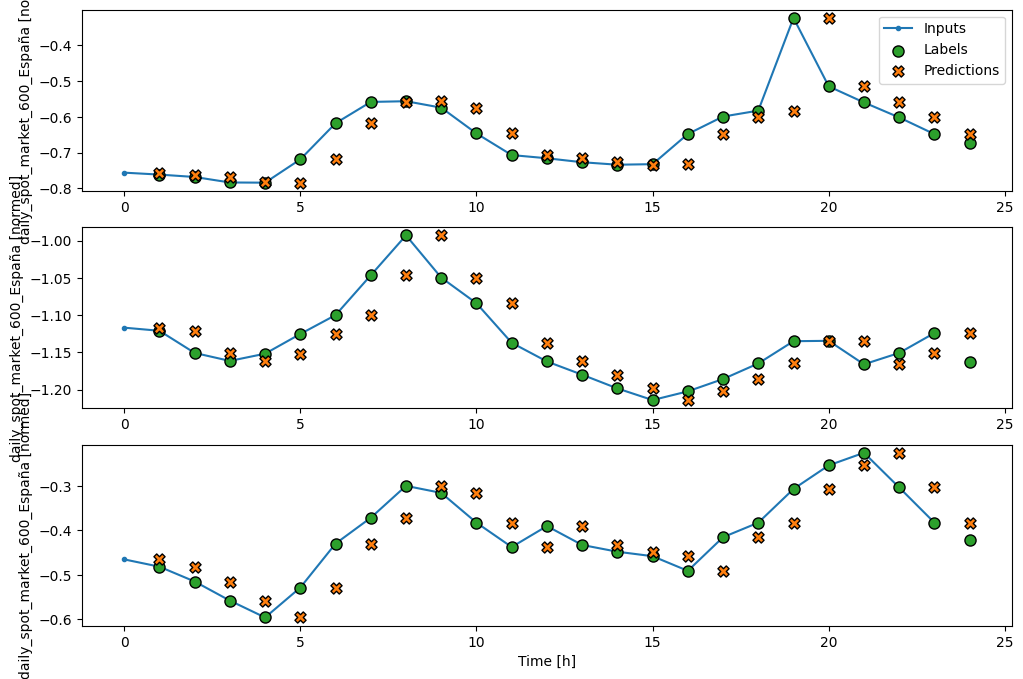

In [22]:
wide_window.plot(baseline)

## Linear model

An easy and simple model quite more interesting than the previous one.

In [23]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

As we are training a lot of models and I'm gonna save an auxiliar function here to be used everywhere needed.

In [13]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [25]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3673 - mean_absolute_error: 0.8342 - val_loss: 0.1027 - val_mean_absolute_error: 0.2570
Epoch 2/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0850 - mean_absolute_error: 0.2073 - val_loss: 0.0843 - val_mean_absolute_error: 0.2294
Epoch 3/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0651 - mean_absolute_error: 0.1810 - val_loss: 0.0578 - val_mean_absolute_error: 0.1856
Epoch 4/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0468 - mean_absolute_error: 0.1516 - val_loss: 0.0406 - val_mean_absolute_error: 0.1510
Epoch 5/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0338 - mean_absolute_error: 0.1256 - val_loss: 0.0312 - val_mean_absolute_error: 0.1273
Epoch 6/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0269 - mean_absolute_error: 0.1076 - val_loss: 0.0277 - val_mean_absolute_error: 0.1153
Epoch 7/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0239 - mean_absolute_error: 0.0973 - v

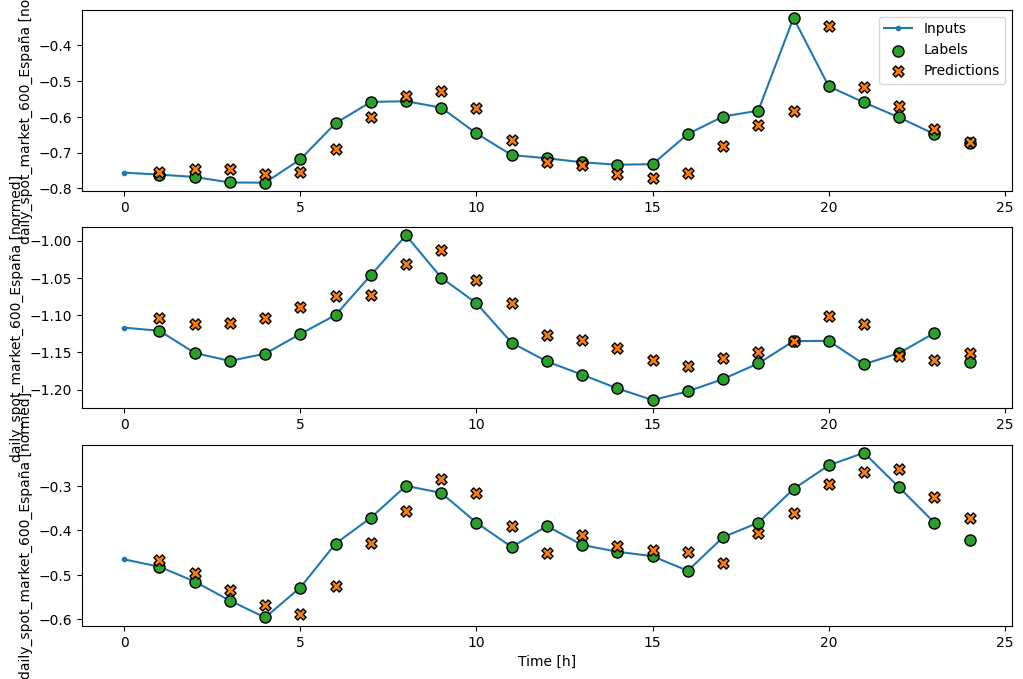

In [26]:
wide_window.plot(linear)

We can easily interpret the model due to its simplicity. It's really easy to see the weights on each input.

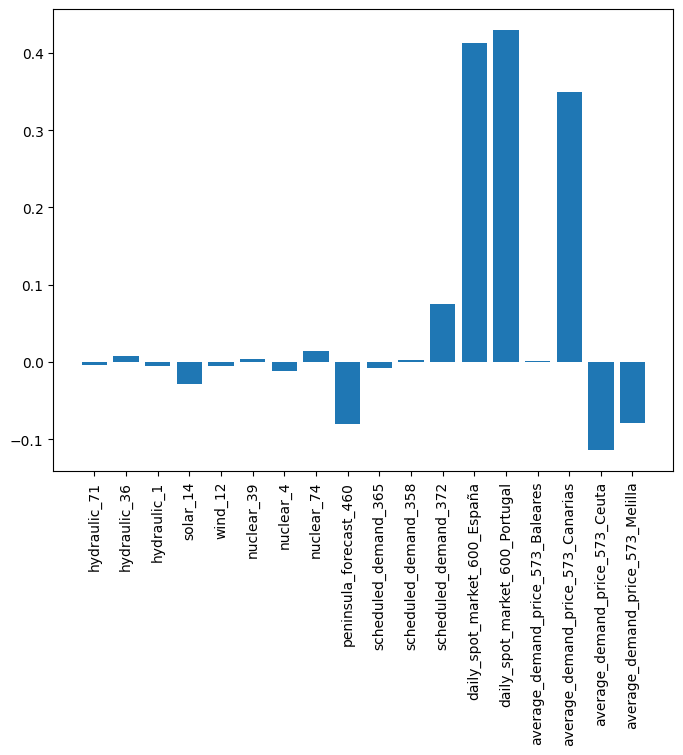

In [27]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## Dense layers

Before applying models with multiples time-steps, let's start adding some dense layers

In [28]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1002 - mean_absolute_error: 0.1732 - val_loss: 0.0315 - val_mean_absolute_error: 0.1293
Epoch 2/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0218 - mean_absolute_error: 0.0944 - val_loss: 0.0305 - val_mean_absolute_error: 0.1278
Epoch 3/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0202 - mean_absolute_error: 0.0908 - val_loss: 0.0306 - val_mean_absolute_error: 0.1271
Epoch 4/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0194 - mean_absolute_error: 0.0879 - val_loss: 0.0288 - val_mean_absolute_error: 0.1235
Epoch 5/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0189 - mean_absolute_error: 0.0865 - val_loss: 0.0278 - val_mean_absolute_error: 0.1217
Epoch 6/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0180 - mean_absolute_error: 0.0837 - val_loss: 0.0248 - val_mean_absolute_error: 0.1140
Epoch 7/20
870/870 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0175 - mean_absolute_error: 0.0828 - v

With a single-time-step model we have no context of the input in the previous time. Let's fix this

In [29]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['daily_spot_market_600_España'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['daily_spot_market_600_España']

Text(0.5, 0.98, 'Predict 1 hour ahead using 3 hours of data')

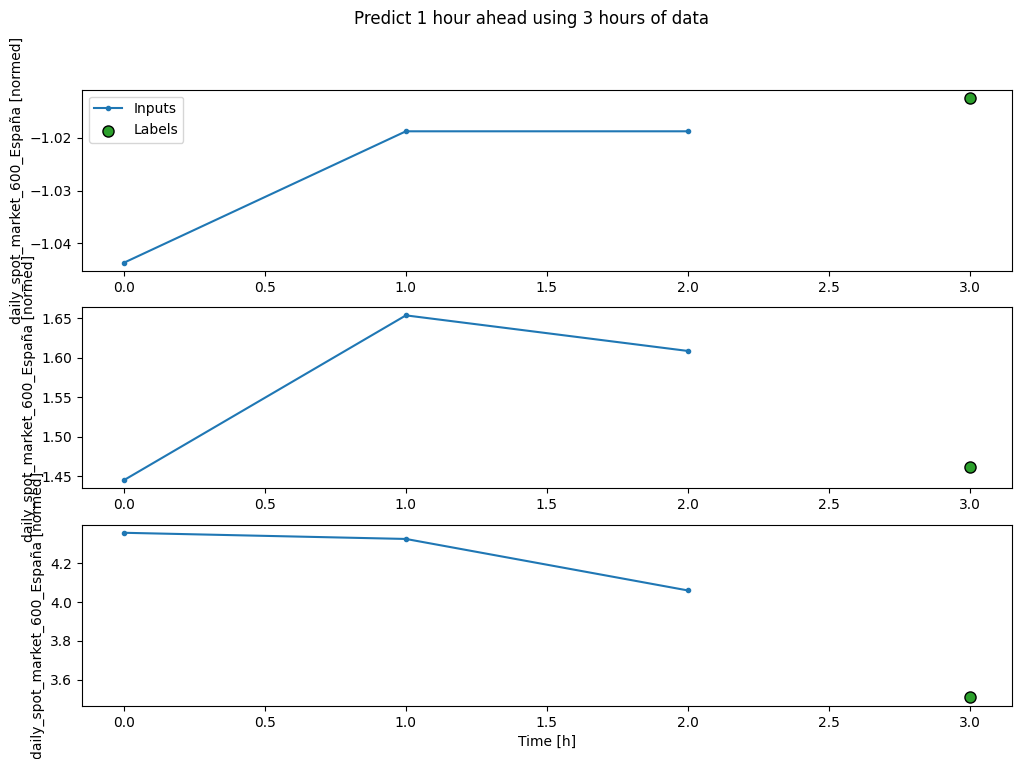

In [30]:
conv_window.plot()
plt.suptitle("Predict 1 hour ahead using 3 hours of data")

In [31]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [32]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 18)
Output shape: (32, 1, 1)


In [33]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val, return_dict=True)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0, return_dict=True)

290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0198 - mean_absolute_error: 0.1047


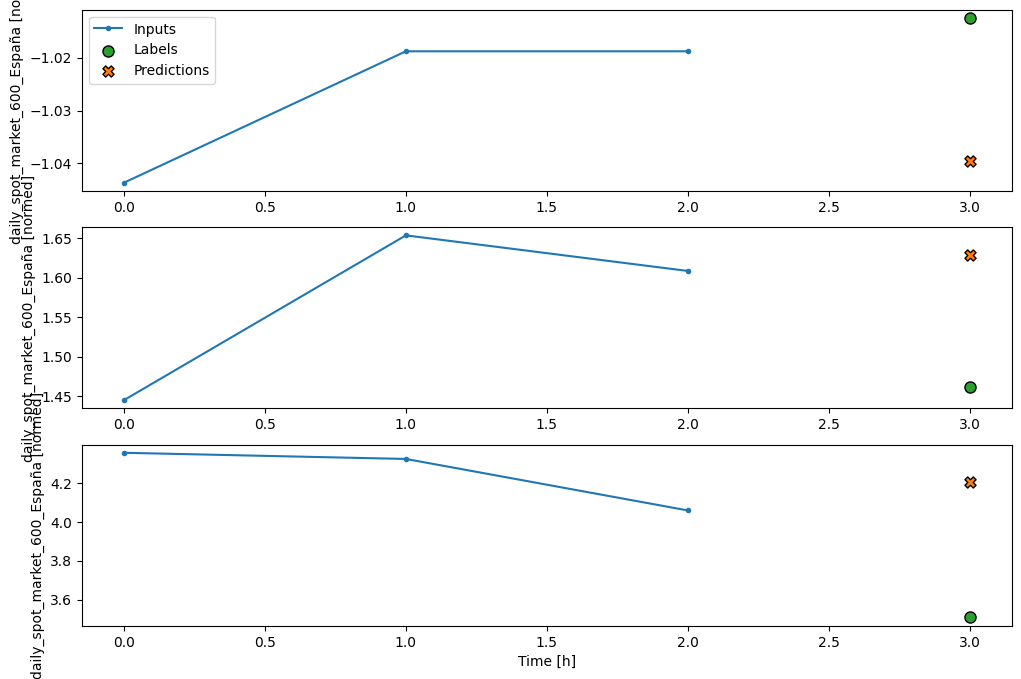

In [34]:
conv_window.plot(multi_step_dense)

In [35]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 18)

ValueError:Exception encountered when calling Sequential.call().

Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 54, but received input with shape (32, 432)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 24, 18), dtype=float32)
  • training=None
  • mask=None


Going to fix this with a convolutional model

In [36]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [37]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val, return_dict=True)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0, return_dict=True)

290/290 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0227 - mean_absolute_error: 0.1097


In [38]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['daily_spot_market_600_España'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['daily_spot_market_600_España']

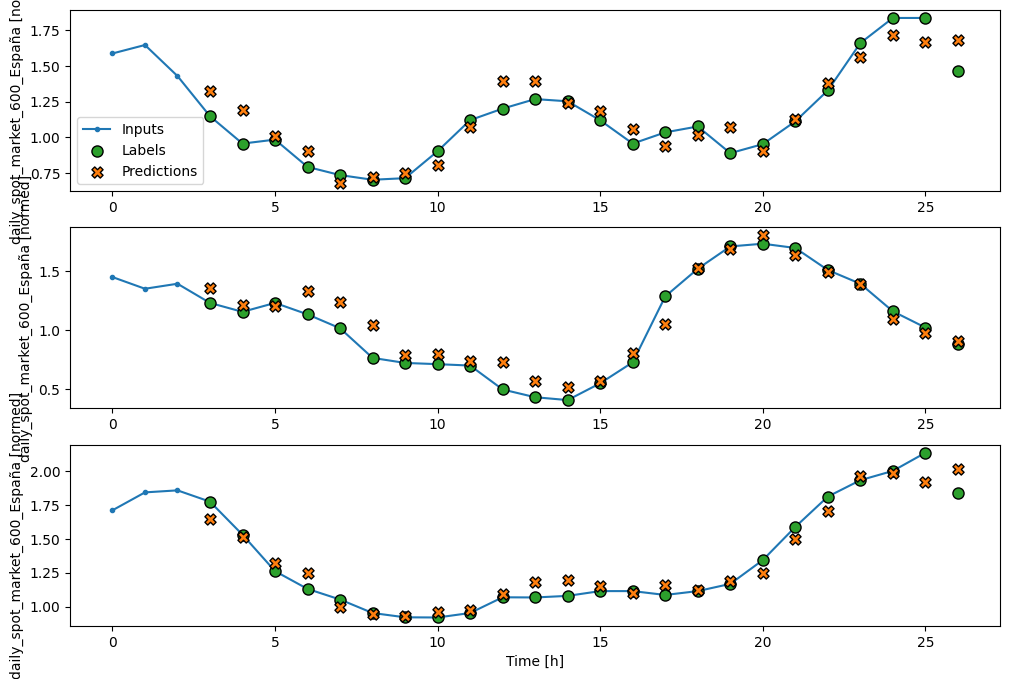

In [39]:
wide_conv_window.plot(conv_model)

## RNN Recurrent Neural Network

Concretely we are going to implement a RNN layer called Long Short-Term Memory 

In [40]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [45]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0179 - mean_absolute_error: 0.0959


## Performance

Review of the performance through the different models

In [19]:
cm = lstm_model.metrics[1]
cm.metrics

[<MeanAbsoluteError name=mean_absolute_error>]

In [43]:
val_performance

{'Baseline': {'loss': 0.024693606421351433,
  'mean_absolute_error': 0.10056713223457336},
 'Linear': {'loss': 0.023811515420675278,
  'mean_absolute_error': 0.10294821858406067},
 'Dense': {'loss': 0.028515689074993134,
  'mean_absolute_error': 0.12420203536748886},
 'Multi step dense': {'loss': 0.02062627486884594,
  'mean_absolute_error': 0.10607881098985672},
 'Conv': {'loss': 0.022739071398973465,
  'mean_absolute_error': 0.1100614070892334},
 'LSTM': {'loss': 0.016673268750309944,
  'mean_absolute_error': 0.0917573943734169}}

A plot of the statistics

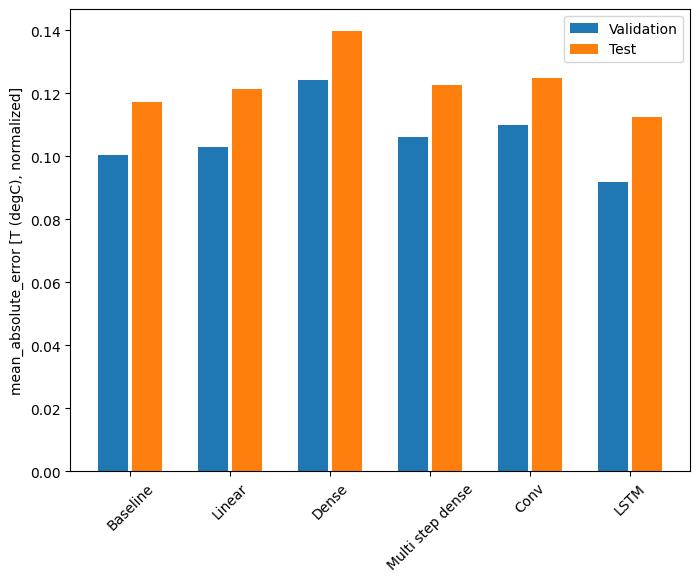

In [44]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

## Multiple predictions

Now let's try to predict price and scheduled demand too.

Demand got 3 columns on the dataset (358, 365, 372). They represent the demand with information of days D-1, D and D+1 respectively

In [20]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['daily_spot_market_600_España', 'scheduled_demand_358', 'scheduled_demand_365', 'scheduled_demand_372'])

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=4)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance = {}
performance = {}
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0, return_dict=True)

print()


294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0187 - mean_absolute_error: 0.0883

CPU times: user 5min 42s, sys: 1min 11s, total: 6min 53s
Wall time: 2min 12s
